In [4]:
import math

Problema I
Se pide agrupar un total de 8 patrones bidimensionales en tres clusters (𝑘 =
3). Los patrones son los siguientes: A1 (2,10), A2(2,5), A3(8,4), A4(5,8), A5(7,5),
A6(6,4), A7(1,2) y A8(4,9). Los centroides iniciales son los puntos A1, A3 y A4.
La métrica de distancia utilizada será la distancia euclídea.
Se pide:
1. Representar los clusters creados y la posición de los centroides después
de cada iteración.


In [5]:

# Patrones
A1 = [2, 10]
A2 = [2, 5]
A3 = [8, 4]
A4 = [5, 8]
A5 = [7, 5]
A6 = [6, 4]
A7 = [1, 2]
A8 = [4, 9]

data = [A1, A2, A3, A4, A5, A6, A7, A8]

# Centroides iniciales
centroids = [A1, A3, A4]



In [6]:
def calculate_sse(clusters, centroids):
    sse = 0
    for i, cluster in enumerate(clusters):
        for point in cluster:
            sse += euclidean_distance(point, centroids[i])**2
    return sse
# Función de distancia euclídea
def euclidean_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
def kmeans(data, centroids):
    iterations = 0
    old_centroids = [[0, 0] for _ in centroids]
    while centroids != old_centroids:
        iterations += 1
        print(f"\nIteración {iterations}")
        print("Centroides:", centroids)
        
        # 1. Asignación de puntos a clusters
        clusters = [[] for _ in centroids]
        for point in data:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_index = distances.index(min(distances))
            clusters[cluster_index].append(point)

        # Imprimir clusters
        for i, cluster in enumerate(clusters):
            print(f"Cluster {i + 1}: {cluster}")

        # 2. Actualización de los centroides
        old_centroids = centroids.copy()
        for i, cluster in enumerate(clusters):
            if cluster:  # si el cluster tiene puntos
                x_coords = [point[0] for point in cluster]
                y_coords = [point[1] for point in cluster]
                centroids[i] = [sum(x_coords) / len(cluster), sum(y_coords) / len(cluster)]
    return calculate_sse(clusters, centroids)

sse = kmeans(data, centroids)


Iteración 1
Centroides: [[2, 10], [8, 4], [5, 8]]
Cluster 1: [[2, 10]]
Cluster 2: [[8, 4], [7, 5], [6, 4]]
Cluster 3: [[2, 5], [5, 8], [1, 2], [4, 9]]

Iteración 2
Centroides: [[2.0, 10.0], [7.0, 4.333333333333333], [3.0, 6.0]]
Cluster 1: [[2, 10], [4, 9]]
Cluster 2: [[8, 4], [7, 5], [6, 4]]
Cluster 3: [[2, 5], [5, 8], [1, 2]]

Iteración 3
Centroides: [[3.0, 9.5], [7.0, 4.333333333333333], [2.6666666666666665, 5.0]]
Cluster 1: [[2, 10], [5, 8], [4, 9]]
Cluster 2: [[8, 4], [7, 5], [6, 4]]
Cluster 3: [[2, 5], [1, 2]]

Iteración 4
Centroides: [[3.6666666666666665, 9.0], [7.0, 4.333333333333333], [1.5, 3.5]]
Cluster 1: [[2, 10], [5, 8], [4, 9]]
Cluster 2: [[8, 4], [7, 5], [6, 4]]
Cluster 3: [[2, 5], [1, 2]]


El valor de la métrica SSE.

In [7]:

print(f"\nValor de SSE: {round(sse,4)}")


Valor de SSE: 14.3333


Comparar los resultados con los obtenidos en el ejemplo de la sección 2.3. del manual de la lección 5.
R = Los problemas tienen exactamente los mismos valores en el patrones dados, cambiando unicamente los centroides iniciales 

In [8]:
centroides_2 = [A1, A4 , A7]

sse_2 = kmeans(data, centroides_2)
print(f"\nValor de SSE: {round(sse_2,4)}"	)
print(sse_2 == sse)


Iteración 1
Centroides: [[2, 10], [5, 8], [1, 2]]
Cluster 1: [[2, 10]]
Cluster 2: [[8, 4], [5, 8], [7, 5], [6, 4], [4, 9]]
Cluster 3: [[2, 5], [1, 2]]

Iteración 2
Centroides: [[2.0, 10.0], [6.0, 6.0], [1.5, 3.5]]
Cluster 1: [[2, 10], [4, 9]]
Cluster 2: [[8, 4], [5, 8], [7, 5], [6, 4]]
Cluster 3: [[2, 5], [1, 2]]

Iteración 3
Centroides: [[3.0, 9.5], [6.5, 5.25], [1.5, 3.5]]
Cluster 1: [[2, 10], [5, 8], [4, 9]]
Cluster 2: [[8, 4], [7, 5], [6, 4]]
Cluster 3: [[2, 5], [1, 2]]

Iteración 4
Centroides: [[3.6666666666666665, 9.0], [7.0, 4.333333333333333], [1.5, 3.5]]
Cluster 1: [[2, 10], [5, 8], [4, 9]]
Cluster 2: [[8, 4], [7, 5], [6, 4]]
Cluster 3: [[2, 5], [1, 2]]

Valor de SSE: 14.3333
True


Como se puede ver el SSE es el mismo que el obtenido en el ejemplo de la leccion 5, asi como los resultados en los clusters, 
El algoritmo de K-means es sensible a la elección de los centroides iniciales. Si bien cambiar los centroides iniciales puede llevar a diferentes agrupaciones, en algunos casos, distintas elecciones iniciales de centroides pueden converger al mismo resultado. Esta situación puede deberse a varias razones tales como un dataset simple y de reducido tamaño, la distribucion de los datos y la localizacion de los centroids.

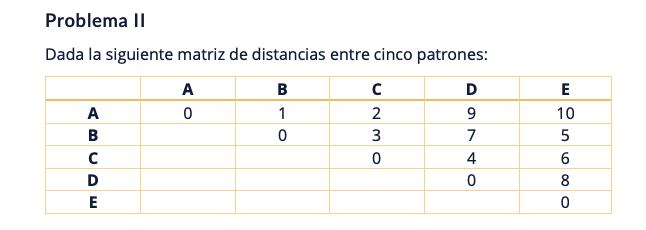

Se pide:
1. Aplicar un clustering jerárquico con el método de enlace simple.
2. Aplicar un clustering jerárquico con el método de enlace completo

Iteración 1: Fusionando {'A'} y {'B'} -> {'A', 'B'}
Iteración 2: Fusionando {'A', 'B'} y {'C'} -> {'A', 'C', 'B'}
Iteración 3: Fusionando {'A', 'C', 'B'} y {'D'} -> {'A', 'C', 'D', 'B'}


/var/folders/r1/hnfbs1ls1hl23clk_tt85vxm0000gn/T/ipykernel_4138/2229268406.py:57: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(np.array(matrix), method='single')


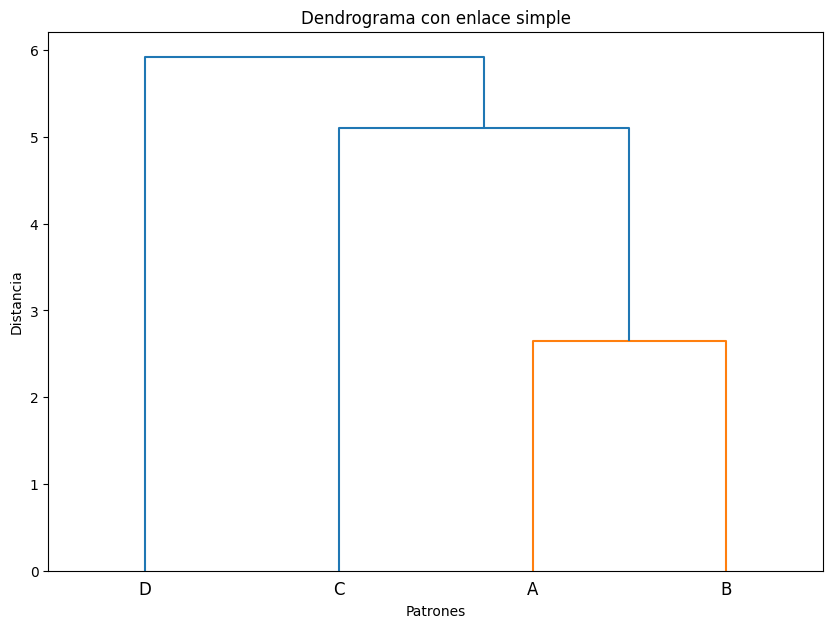

In [9]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Tu matriz de distancias
matrix = [
    [0, 1, 4, 5],
    [None, 0, 2, 6],
    [None, None, 0, 3],
    [None, None, None, 0]
]
index_labels = [ "A",  "B",  "C",   "D"]

# Convertir la matriz a una matriz completa
# Se convierte a una matriz completa debido a que la matriz de distancias es triangular superior 
# (tiene None en la diagonal principal) y la función linkage requiere una matriz completa (sin None) 
for i in range(len(matrix)):
    for j in range(i+1, len(matrix)):
        matrix[j][i] = matrix[i][j]

distances = np.array(matrix)

# Clustering jerárquico
num_clusters = len(distances)
clusters = [{label} for label in index_labels]
iteration = 0

while num_clusters > 1:
    iteration += 1
    
    # Encontrar el par de clusters con la menor distancia
    i, j = np.unravel_index(np.argmin(distances + np.diag([np.inf]*num_clusters)), distances.shape)
    
    # Fusionar estos clusters
    new_cluster = clusters[i] | clusters[j]
    
    # Mostrar los resultados de la iteración
    print(f"Iteración {iteration}: Fusionando {clusters[i]} y {clusters[j]} -> {new_cluster}")
    
    # Actualizar la lista de clusters
    clusters[i] = new_cluster
    del clusters[j]
    
    # Actualizar la matriz de distancias
    new_distances = np.delete(distances, j, axis=0)
    new_distances = np.delete(new_distances, j, axis=1)
    
    for k in range(len(new_distances)):
        if k != i:
            # Enlace simple: usar la menor distancia
            new_distances[i, k] = new_distances[k, i] = min(distances[i, k], distances[j, k])
    
    distances = new_distances
    num_clusters -= 1

# Ahora vamos a visualizar el dendrograma usando scipy
Z = linkage(np.array(matrix), method='single')

plt.figure(figsize=(10, 7))
dendrogram(Z, labels=index_labels)
plt.title('Dendrograma con enlace simple')
plt.xlabel('Patrones')
plt.ylabel('Distancia')
plt.show()

Iteración 1: Fusionando {'A'} y {'B'} -> {'A', 'B'}
Iteración 2: Fusionando {'A', 'B'} y {'C'} -> {'A', 'C', 'B'}
Iteración 3: Fusionando {'A', 'C', 'B'} y {'D'} -> {'A', 'C', 'D', 'B'}


/var/folders/r1/hnfbs1ls1hl23clk_tt85vxm0000gn/T/ipykernel_4138/7635278.py:38: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(np.array(matrix), method='complete')


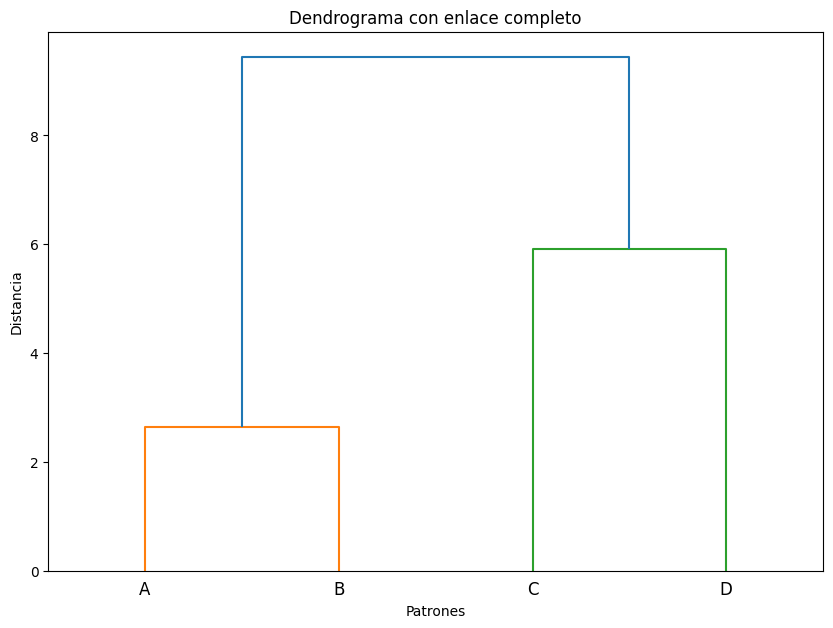

In [10]:
# Enlace Completo
distances = np.array(matrix)

# Clustering jerárquico
num_clusters = len(distances)
clusters = [{label} for label in index_labels]
iteration = 0

while num_clusters > 1:
    iteration += 1
    
    # Encontrar el par de clusters con la menor distancia
    i, j = np.unravel_index(np.argmin(distances + np.diag([np.inf]*num_clusters)), distances.shape)
    
    # Fusionar estos clusters
    new_cluster = clusters[i] | clusters[j]
    
    # Mostrar los resultados de la iteración
    print(f"Iteración {iteration}: Fusionando {clusters[i]} y {clusters[j]} -> {new_cluster}")
    
    # Actualizar la lista de clusters
    clusters[i] = new_cluster
    del clusters[j]
    
    # Actualizar la matriz de distancias
    new_distances = np.delete(distances, j, axis=0)
    new_distances = np.delete(new_distances, j, axis=1)
    
    for k in range(len(new_distances)):
        if k != i:
            # Enlace completo: usar la mayor distancia
            new_distances[i, k] = new_distances[k, i] = max(distances[i, k], distances[j, k])
    
    distances = new_distances
    num_clusters -= 1

# Ahora vamos a visualizar el dendrograma usando scipy
Z = linkage(np.array(matrix), method='complete')

plt.figure(figsize=(10, 7))
dendrogram(Z, labels=index_labels)
plt.title('Dendrograma con enlace completo')
plt.xlabel('Patrones')
plt.ylabel('Distancia')
plt.show()


¿Se podría usar el método de enlace medio con estos datos? Justifica la respuesta.

R= Sí, se podría usar el método de enlace medio (average linkage) con estos datos. El método de enlace medio considera la distancia entre dos clusters como el promedio de las distancias entre todos los pares de elementos, donde un elemento pertenece a un cluster y el otro elemento al otro cluster.

La justificación para usar cualquier método de enlace en el clustering jerárquico es principalmente una decisión basada en la naturaleza de los datos y el objetivo del análisis. Cada método tiene sus propias características y puede llevar a diferentes estructuras de cluster.

El enlace medio (Average linkage) Es un compromiso entre enlace simple y enlace completo. No es tan sensible a outliers como el enlace simple y no tiende a forzar clusters tan compactos como el enlace completo.

Iteración 1: Fusionando {'A'} y {'B'} -> {'A', 'B'}
Iteración 2: Fusionando {'A', 'B'} y {'C'} -> {'A', 'C', 'B'}
Iteración 3: Fusionando {'A', 'C', 'B'} y {'D'} -> {'A', 'C', 'D', 'B'}


/var/folders/r1/hnfbs1ls1hl23clk_tt85vxm0000gn/T/ipykernel_4138/1275699206.py:45: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(np.array(matrix), method='average')


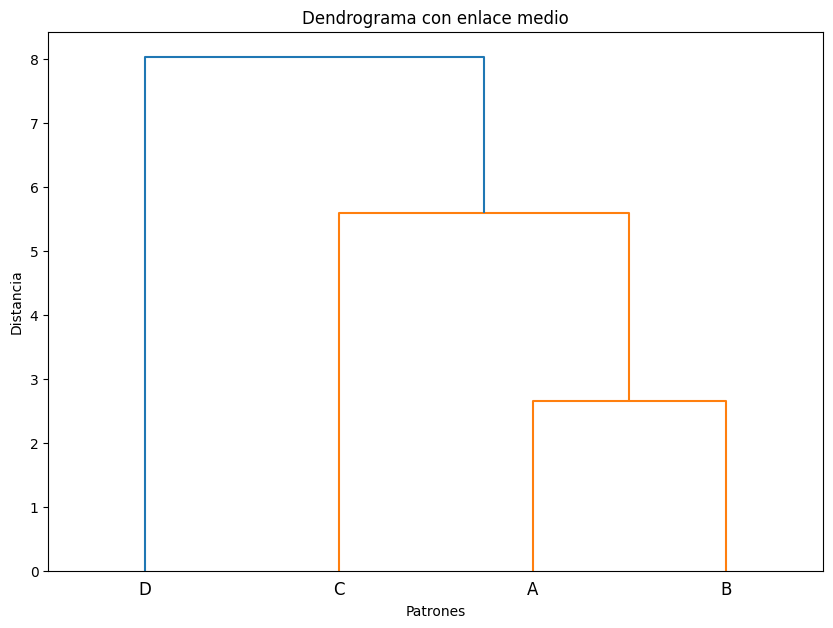

In [11]:
distances = np.array(matrix)

# Clustering jerárquico
num_clusters = len(distances)
clusters = [{label} for label in index_labels]
iteration = 0

while num_clusters > 1:
    iteration += 1
    
    # Encontrar el par de clusters con la menor distancia
    i, j = np.unravel_index(np.argmin(distances + np.diag([np.inf]*num_clusters)), distances.shape)
    
    # Fusionar estos clusters
    new_cluster = clusters[i] | clusters[j]
    
    # Mostrar los resultados de la iteración
    print(f"Iteración {iteration}: Fusionando {clusters[i]} y {clusters[j]} -> {new_cluster}")
    
    # Actualizar la lista de clusters
    clusters[i] = new_cluster
    del clusters[j]
    
    # Actualizar la matriz de distancias
    new_distances = np.delete(distances, j, axis=0)
    new_distances = np.delete(new_distances, j, axis=1)
    
    for k in range(len(new_distances)):
        if k != i:
            # Enlace medio: calcular la distancia promedio entre los clusters
            total_distance = 0
            count = 0
            for elem_i in clusters[i]:
                for elem_j in clusters[j]:
                    total_distance += matrix[index_labels.index(elem_i)][index_labels.index(elem_j)]
                    count += 1
            avg_distance = total_distance / count
            
            new_distances[i, k] = new_distances[k, i] = avg_distance
    
    distances = new_distances
    num_clusters -= 1

# Ahora vamos a visualizar el dendrograma usando scipy
Z = linkage(np.array(matrix), method='average')

plt.figure(figsize=(10, 7))
dendrogram(Z, labels=index_labels)
plt.title('Dendrograma con enlace medio')
plt.xlabel('Patrones')
plt.ylabel('Distancia')
plt.show()